In [3]:
# Click into this cell and press shift-enter before using this notebook.
# These lines import the Python modules we commonly use in CMPSC 5A
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots

In [13]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# APIs, CMPSC 5A, S25



## A short introduction to APIs

Last class I mentioned that I was using *APIs* or short for *Application Programming Interfaces* to set up various things for our Midterm Project.

Specifically, I used the:
* Canvas API to pull group information, and post grading feedback information.
* Google Drive API to create the folders and files and Google Drive, set their permission as well inquire about editing activity (who has edited which files and when)
* Google Chat API to create chat rooms, post messages, and read messages

<details>
<summary>
<strong>More detail for the curious</strong>: It is not necessary for you to look through the details, which are beyond the scope of this course.  But, in case you are curious
about what Python code that can do these things looks like, you may click the triangle for a more detailed version and a link to the code (which is a bit of a mess, and a work in progress).
</summary>

### The TeamFolderCreator project

This [github repository](https://github.com/ucsb-cs/TeamFolderCreator/) contains the Python code used to create the scripts.

Here's a slightly more detailed summary of what I did with this code:

<ul>
  <li>Used the Canvas API to pull the group information from Canvas</li>
  <li>Used the Google Drive API to:
    <ul>
      <li>Create folders for each Group on Google Drive (using the Google Drive API)</li>
      <li>Set the permissions for each Group so that only that group, and the course staff can access the files in that folder</li>
      <li>Populate those folders with Google Colab notebooks for each member (and in later versions, inserting code to prevent duplicates)</li>
      <li>Pull information about which files had been modified by whom and when</li>
    </ul>
  </li>
  <li>Used the Google Chat API to:
    <ul>
      <li>Create a Chat Space for each group</li>
      <li>Add all the group members to the Chat Space</li>
      <li>Send an initial message to the Group Chat with a link to their Google Drive folder</li>
      <li>Collect messages from the Chat to give participation grades</li>
    </ul>
  </li>
  <li>Circled back to the Canvas API to post summaries of activity to make grading easier</li>
</ul>

By the time you read this, the code may have changed, but one of the beautiful things about Github is that you can see *all the previous versions of the code too* if you really wanted to.

</details>

  


### Some API code that's a bit easier to follow

Using the Canvas, Google Drive and Google Chat APIs is beyond the scope of this course.

But I did want to give you at least a little taste of what working with APIs is like in a *data science* context, because APIs can be a rich source of data.

**Some APIs cost money**.  That's right, you have to sign up for a "token" or an "api key", which is something like a "password" that you have to set in your code.  Getting one requires a credit card and a billing plan.

**But there are also free APIs**.   Let's look at two of them.  Here are two APIs of the many APIs provided for free by the US Federal Government:

* **Weather API**: The National Weather Service is an agency of the National Ocean and Atmospheric Administration, which is part of the US Department of Commerce. They provide APIs for weather information.
* **Earthquake API**: The U.S. Geological Survey (USGS) is a scientific agency of the U.S. Department of the Interior focusing on Earth Science.  Among other things, it tracks earthquake activity.

(I should note that the scope of activities of the US Federal Government is changing rapidly; the statements above were true as of May 2, 2025.)

Let's look at each of these briefly.

### Weather API provided by NOAA

First, let's start with a bit of code that comes from our discussion of [Chapter 1 of our textbook](https://inferentialthinking.com/chapters/01/what-is-data-science.html).

You might remember that in that chapter, there's some code that downloads the text of two novels (*Huckleberry Finn*, and *Little Women*).

But that code was missing a function definition, namely the definition of `real_url`, which we finally found on [this web page from the notes for Data 8 from Spring 2023](https://www.data8.org/sp23/assets/demo_html/lec01.html?utm_source=chatgpt.com)


In [ ]:
# A tiny program to download text from the web.
def read_url(url):
    from urllib.request import urlopen
    import re
    return re.sub('\\s+', ' ', urlopen(url).read().decode())


We can use this function to read from any url.  

Here's a url that gives us the weather forecast for Santa Barbara as a web page formatted for humans:

* <https://forecast.weather.gov/MapClick.php?zoneid=CAZ350>

We could use our code to read from that page.  Here's an example:

In [ ]:
weather_forecast = read_url("https://forecast.weather.gov/MapClick.php?zoneid=CAZ350")
weather_forecast[0:1024]

'<!DOCTYPE html><html class="no-js"> <head> <!-- Meta --> <meta name="viewport" content="width=device-width" /> <link rel="schema.DC" href="http://purl.org/dc/elements/1.1/" /> <title>National Weather Service</title> <meta name="DC.title" content="National Weather Service" /> <meta name="DC.description" content="NOAA National Weather Service" /> <meta name="DC.creator" content="US Department of Commerce, NOAA, National Weather Service" /> <meta name="DC.date.created" scheme="ISO8601" content="2025-05-02T17:17:55+00:00" /> <meta name="DC.language" scheme="DCTERMS.RFC1766" content="EN-US" /> <meta name="DC.keywords" content="weather" /> <meta name="DC.publisher" content="NOAA\'s National Weather Service" /> <meta name="DC.contributor" content="National Weather Service" /> <meta name="DC.rights" content="/disclaimer.php" /> <meta name="rating" content="General" /> <meta name="robots" content="index,follow" /> <!-- Icons --> <link rel="shortcut icon" href="/build/images/favicon.eab6deff.ic

We could try to read from that web page and do something called *web scraping* where we use code to go through all of the HTML on the page and find what we are looking for.  But web scraping is super tedious and error prone.  This is just the first 1024 characters of this information, and we still haven't seen anything that looks like an actual forecast.

If you want to see what it would take to get information out of this web page via a process called *web scraping*, there's a whole other notebook called "lecture11_web_scraping.ipynb" that goes over that.

But we'll do something different, and much easier: we'll use an API

# The NWS API

The National Weather Service API is documented here:
* <https://www.weather.gov/documentation/services-web-api>

I'm going to skip over some details and give you a URL that we can use to get the Santa Barbara weather forecast:

* <https://api.weather.gov/gridpoints/LOX/100,71/forecast>

If you bring up that API in a browser, you'll see that there is weather forecast information, but it's formatted to make it easy for computer programs to read it.

* It's in a format called *JSON* (pronounced "jay sahn", it rhymes with "play on").
* JSON stands for Javascript Object Notation, and it's format widely used for exchanging data between computer programs.
* We can convert this into a single Python object called a "dictionary"

Here's the code to load that information into a Python Dictonary:

In [ ]:
ucsb_weather = read_url('https://api.weather.gov/gridpoints/LOX/100,71/forecast')

import json
weather = json.loads(ucsb_weather)
print(type(weather))

<class 'dict'>


The variable `weather` is of type `dict` which stands for *dictionary*.   
* A Python dictionary is an association between *keys* and *values*
* We can get a nicely formatted version of dictionary using a function called pprint, which works like this:

You'll see that the output is *big*.  We'll discuss how to make sense of it in a moment.

In [ ]:
from pprint import pprint
pprint(weather)

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
              {'@version': '1.1',
               '@vocab': 'https://api.weather.gov/ontology#',
               'geo': 'http://www.opengis.net/ont/geosparql#',
               'unit': 'http://codes.wmo.int/common/unit/',
               'wx': 'https://api.weather.gov/ontology#'}],
 'geometry': {'coordinates': [[[-119.8308, 34.4025],
                               [-119.8359, 34.4247],
                               [-119.8628, 34.4204999],
                               [-119.8577, 34.3984],
                               [-119.8308, 34.4025]]],
              'type': 'Polygon'},
 'properties': {'elevation': {'unitCode': 'wmoUnit:m', 'value': 0.9144},
                'forecastGenerator': 'BaselineForecastGenerator',
                'generatedAt': '2025-05-02T21:29:06+00:00',
                'periods': [{'detailedForecast': 'Sunny, with a high near 68. '
                                                 'West wind around 

## Dictionaries

One of the most useful Python data types is something called a Dictionary


TODO: Explain dictionaries

## Exploring a complicated dictionary

Our main tools for exploring a complex dictionary are:
* `.keys()` which shows us the keys
* `type` which shows us type information

Let's start by seeing what the keys are for this dictionary:


# UCSB Developer API

UCSB has an API that you can use if you have a UCSB login.

The website is at <https://developer.ucsb.edu>.

Some of the data is not available without approval (and you are unlikely to get approval for the endpoints that provide confidential data.).

However, any of the data that is marked "Auto Approved" is available to anyone that has a UCSB login, including all of these:

| API Category | Resource |
|--------------|----------|
| [Academics](https://developer.ucsb.edu/apis/academics) | [Academic Curriculums](https://developer.ucsb.edu/content/academic-curriculums) |
| [Academics](https://developer.ucsb.edu/apis/academics) | [Academic Graduate Programs](https://developer.ucsb.edu/content/academic-graduate-programs) |
| [Academics](https://developer.ucsb.edu/apis/academics) | [Academic Quarter Calendar](https://developer.ucsb.edu/content/academic-quarter-calendar) |
| [Academics](https://developer.ucsb.edu/apis/academics) | [Events](https://developer.ucsb.edu/content/events) |
| [Dining](https://developer.ucsb.edu/apis/dining) | [Dining Commons](https://developer.ucsb.edu/apis/dining/dining-commons) |
| [Dining](https://developer.ucsb.edu/apis/dining) | [Dining Menu](https://developer.ucsb.edu/apis/dining/dining-menu) |
| [Dining](https://developer.ucsb.edu/apis/dining) | [Meal Plan Rates](https://developer.ucsb.edu/apis/dining/meal-plan-rates) |
| [Students](https://developer.ucsb.edu/apis/students) | [Student Record Code Lookups](https://developer.ucsb.edu/content/student-record-code-lookups) |

To test out one of these, you first need to create an app so that you can get an API key, as shown below:

### Creating an App and API Key for the UCSB Developer API

First, create an account with your UCSB login, and login.  Then click the Apps link on the main menu:



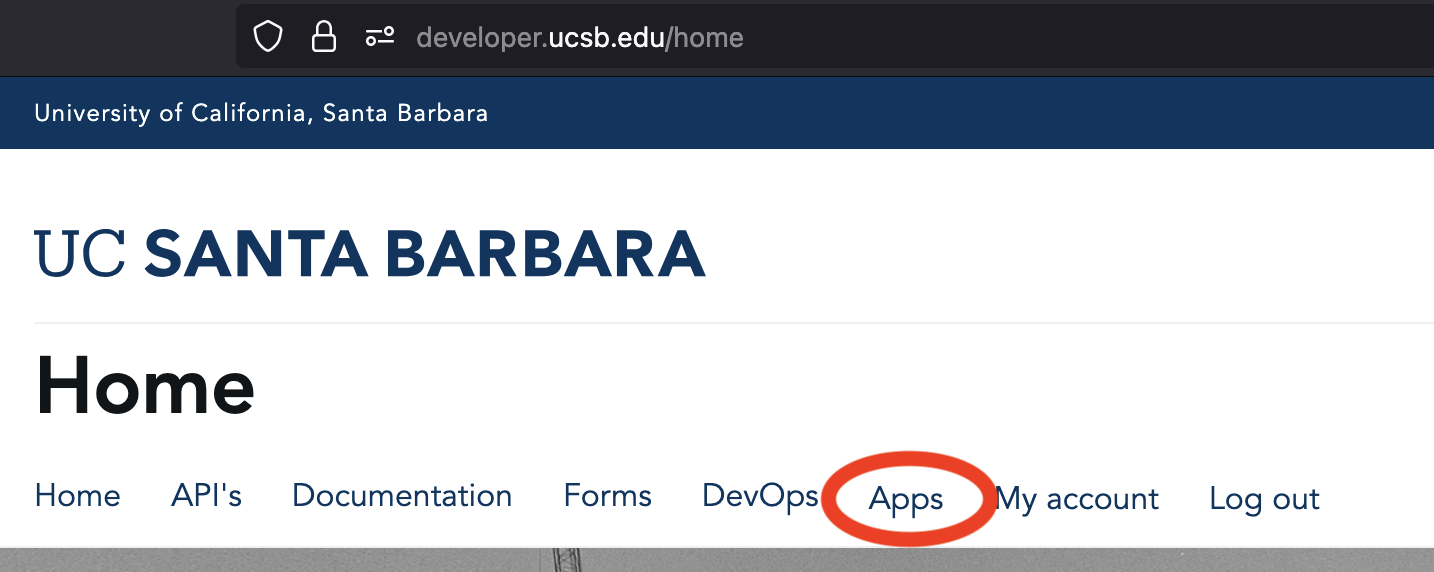


Once you click on `Apps`, you'll see a button to create an new App:

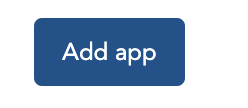

Then you'll see a form.  You only need to do things on this page:
* The app name (this can be anything, e.g. "Data Science Practice")
* Check the boxes for the APIs that you want to use.
* Be sure to *only* check boxes for APIs that are on the "Auto-Approved" list, i.e. any of these:


| API Category | Resource |
|--------------|----------|
| [Academics](https://developer.ucsb.edu/apis/academics) | [Academic Curriculums](https://developer.ucsb.edu/content/academic-curriculums) |
| [Academics](https://developer.ucsb.edu/apis/academics) | [Academic Graduate Programs](https://developer.ucsb.edu/content/academic-graduate-programs) |
| [Academics](https://developer.ucsb.edu/apis/academics) | [Academic Quarter Calendar](https://developer.ucsb.edu/content/academic-quarter-calendar) |
| [Academics](https://developer.ucsb.edu/apis/academics) | [Events](https://developer.ucsb.edu/content/events) |
| [Dining](https://developer.ucsb.edu/apis/dining) | [Dining Commons](https://developer.ucsb.edu/apis/dining/dining-commons) |
| [Dining](https://developer.ucsb.edu/apis/dining) | [Dining Menu](https://developer.ucsb.edu/apis/dining/dining-menu) |
| [Dining](https://developer.ucsb.edu/apis/dining) | [Meal Plan Rates](https://developer.ucsb.edu/apis/dining/meal-plan-rates) |
| [Students](https://developer.ucsb.edu/apis/students) | [Student Record Code Lookups](https://developer.ucsb.edu/content/student-record-code-lookups) |


This is what it looks like to check off all of the auto-approved APIs:

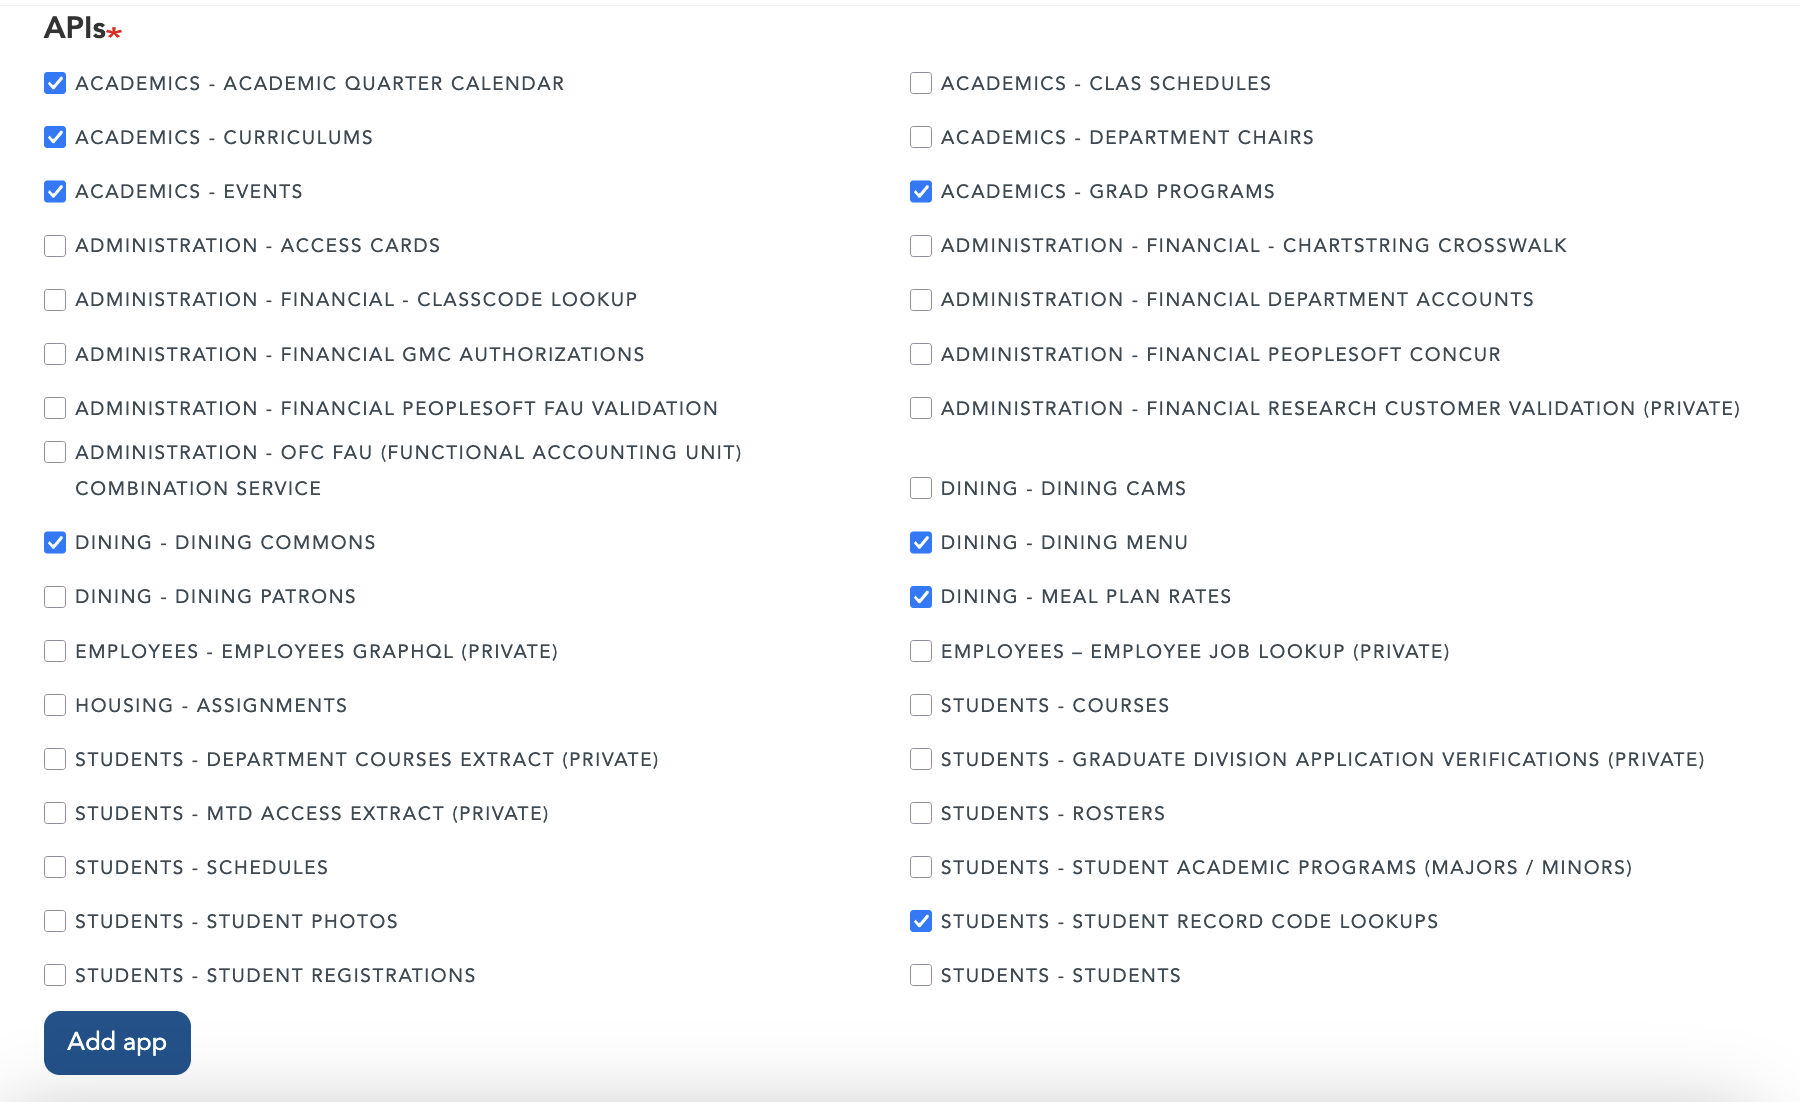

Once you've done that, you'll see your app listed on the Apps tab.  Click on the name of the app, here:

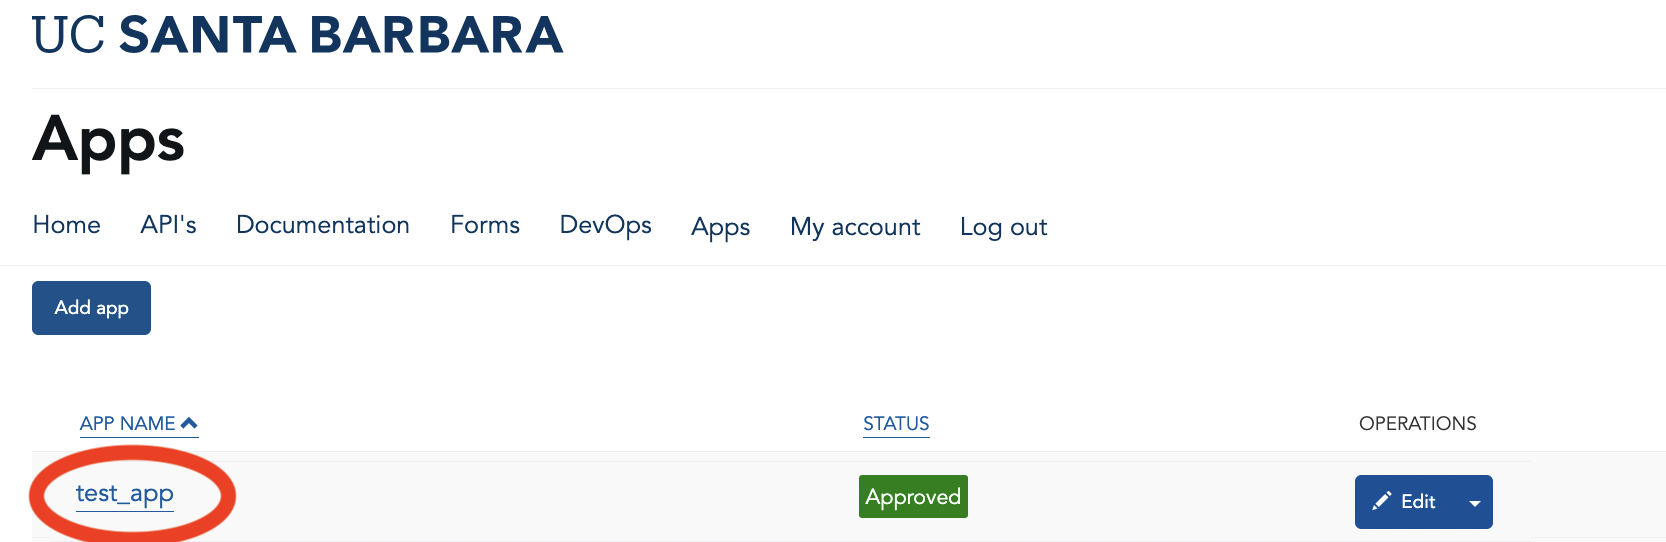

You'll then need to look in the right hand column, about half way down, for this:

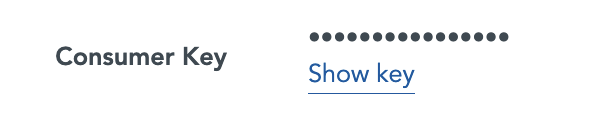

Click the "Show key" link, and it should reveal the key (the one shown below is a fake one, and will not work, but it is similar to the format of the one you'll get; a sequence of letters and numbers.)

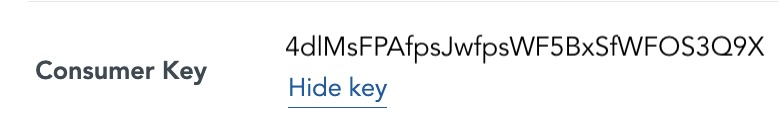

Copy the key value.  You'll need it if you want to try the API interactively, and/or write Python code that accesses the API.

## Accessing Data fron the UCSB API (interactively)

As an example, we'll access data for `Subjects`, using the `Student Record Code Lookups` API.  This will give us a list of the codes for subject areas such as `CMPSC`, `PSTAT`, `ARTHI`, etc. along with the full text of what each code stands for.

We'll first do this interactively, and then we'll show how to do this with Python code.

First, navigate to the `APIs` tab, and then select `Students`:

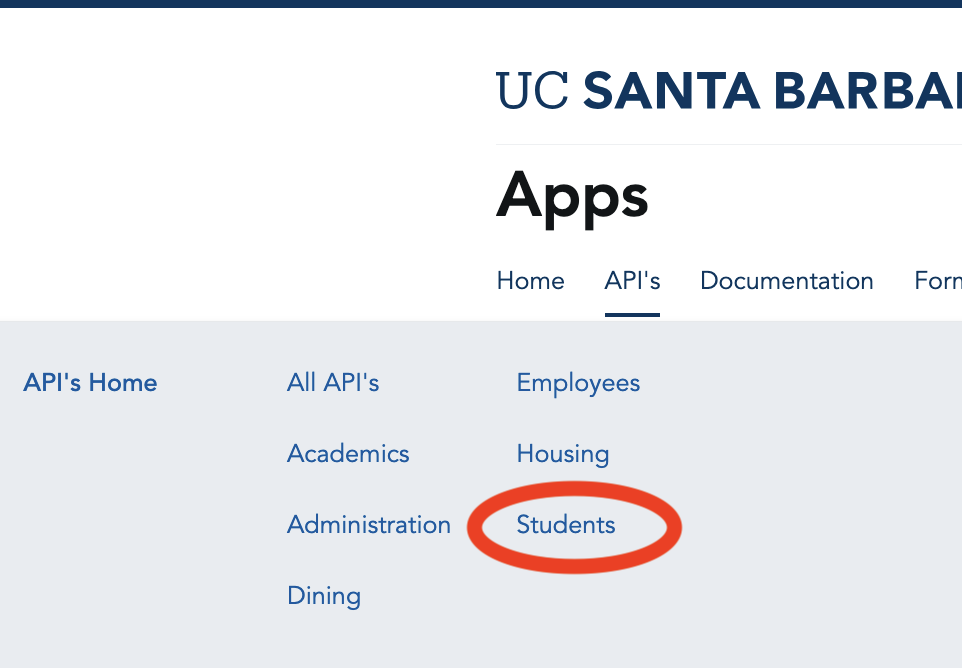

Select the link for `Student Record Code Lookups`.  


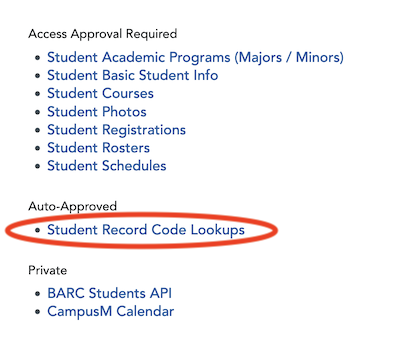


That should take you to a page with the title `Student Record Code Lookups`.  

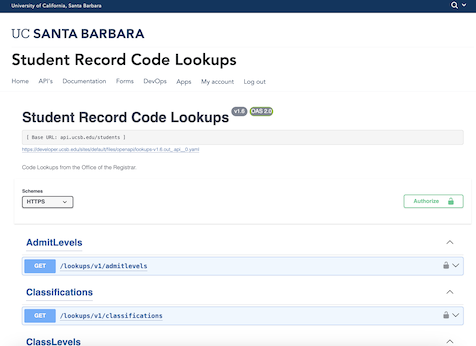

Scroll down until you see this:

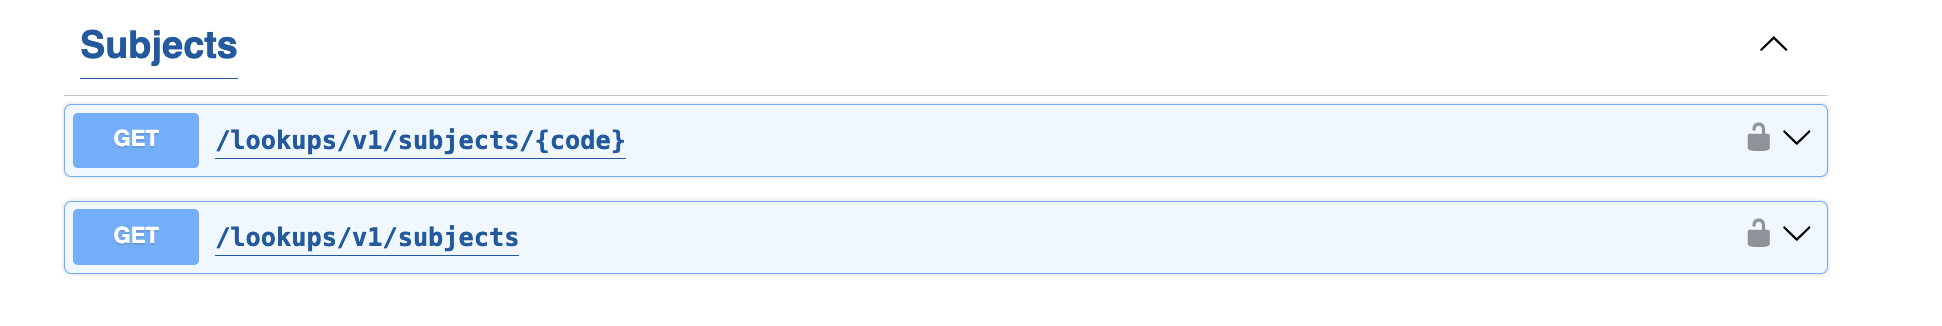

The second of these is the `/lookups/v1/subjects` API endpoint.  This is the endpoint that can give us a list of all subject area codes.   Click on the lock icon to the right of this endpoint that looks like this:

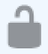

That brings up this screen where you paste in the API key that you copied earlier. Paste in the key, and click `Authorize`

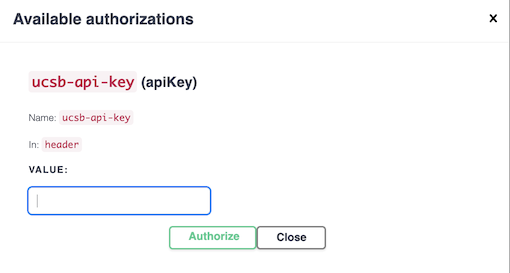

After you click `Authorize` the screen changes to look like this.  Click `Close`

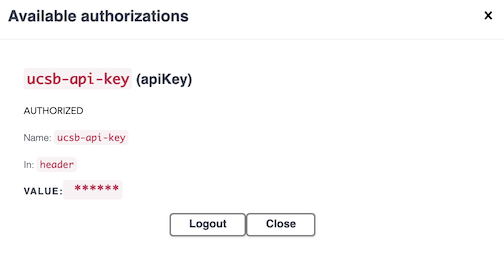

![authorize.png]()

Next, click the `GET` button next to the API endpoint you want to try:

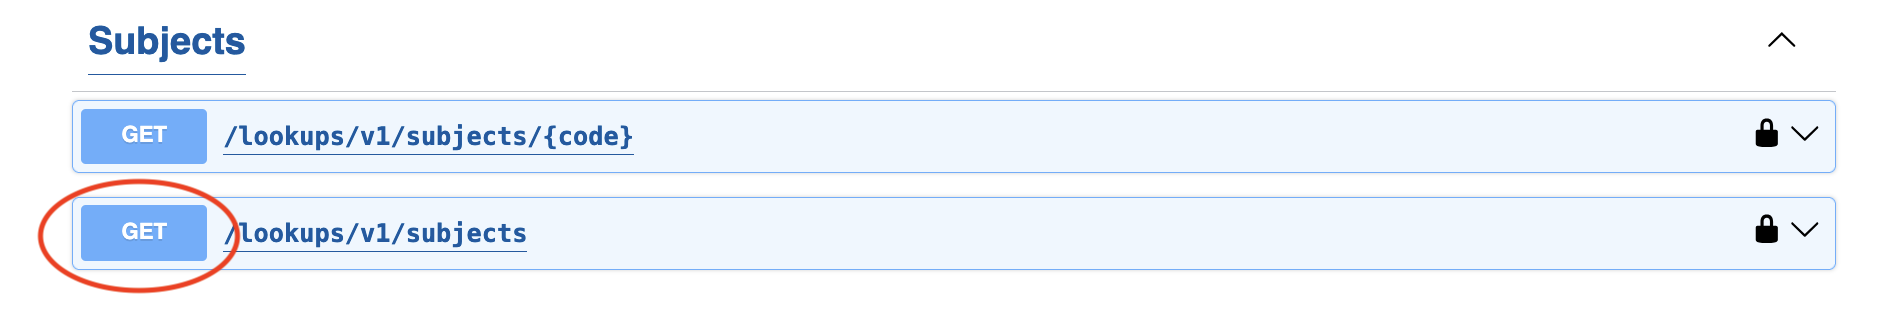

That will open up a section of the page that looks like this.  Find the `Try it Out` button and click it:


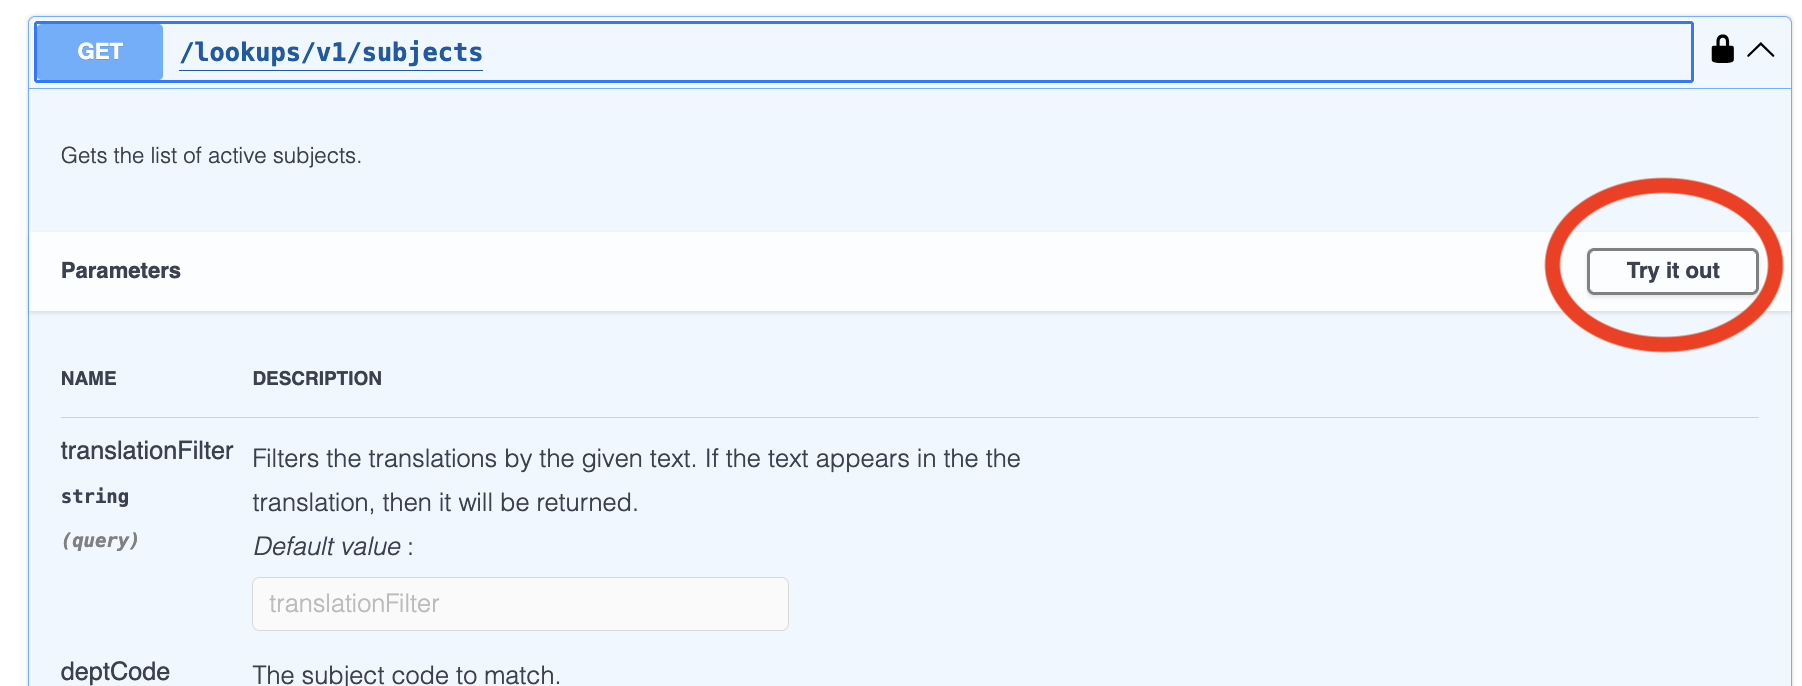

After clicking `Try it out` you should see an `Execute` button like this.  You do not need to fill in any of the fields in this case (though for some other APIs, you might):

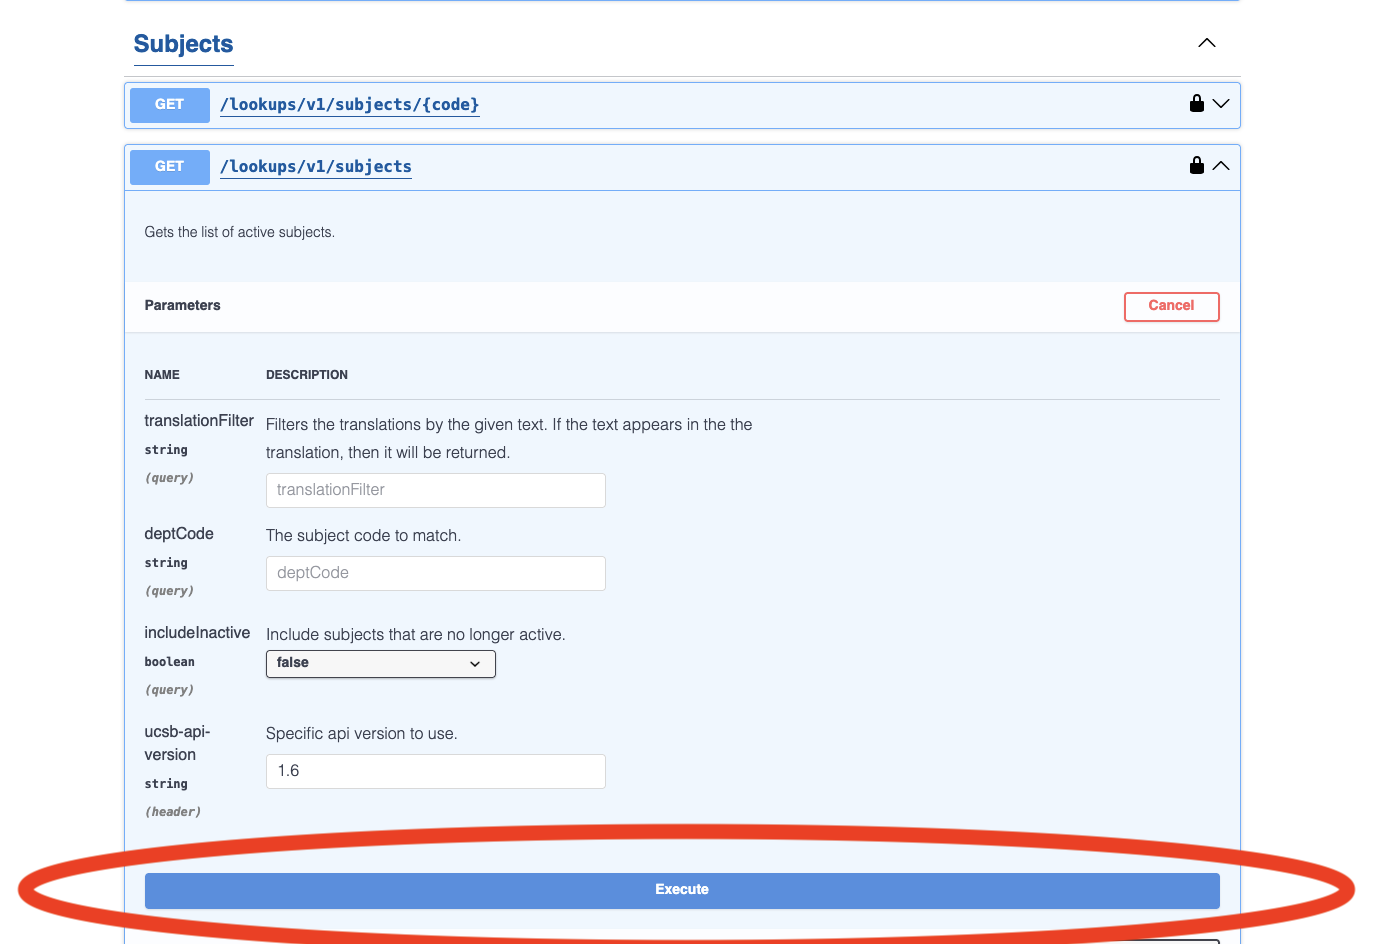

What should happen next is that you get a result below the `Execute` button like this:

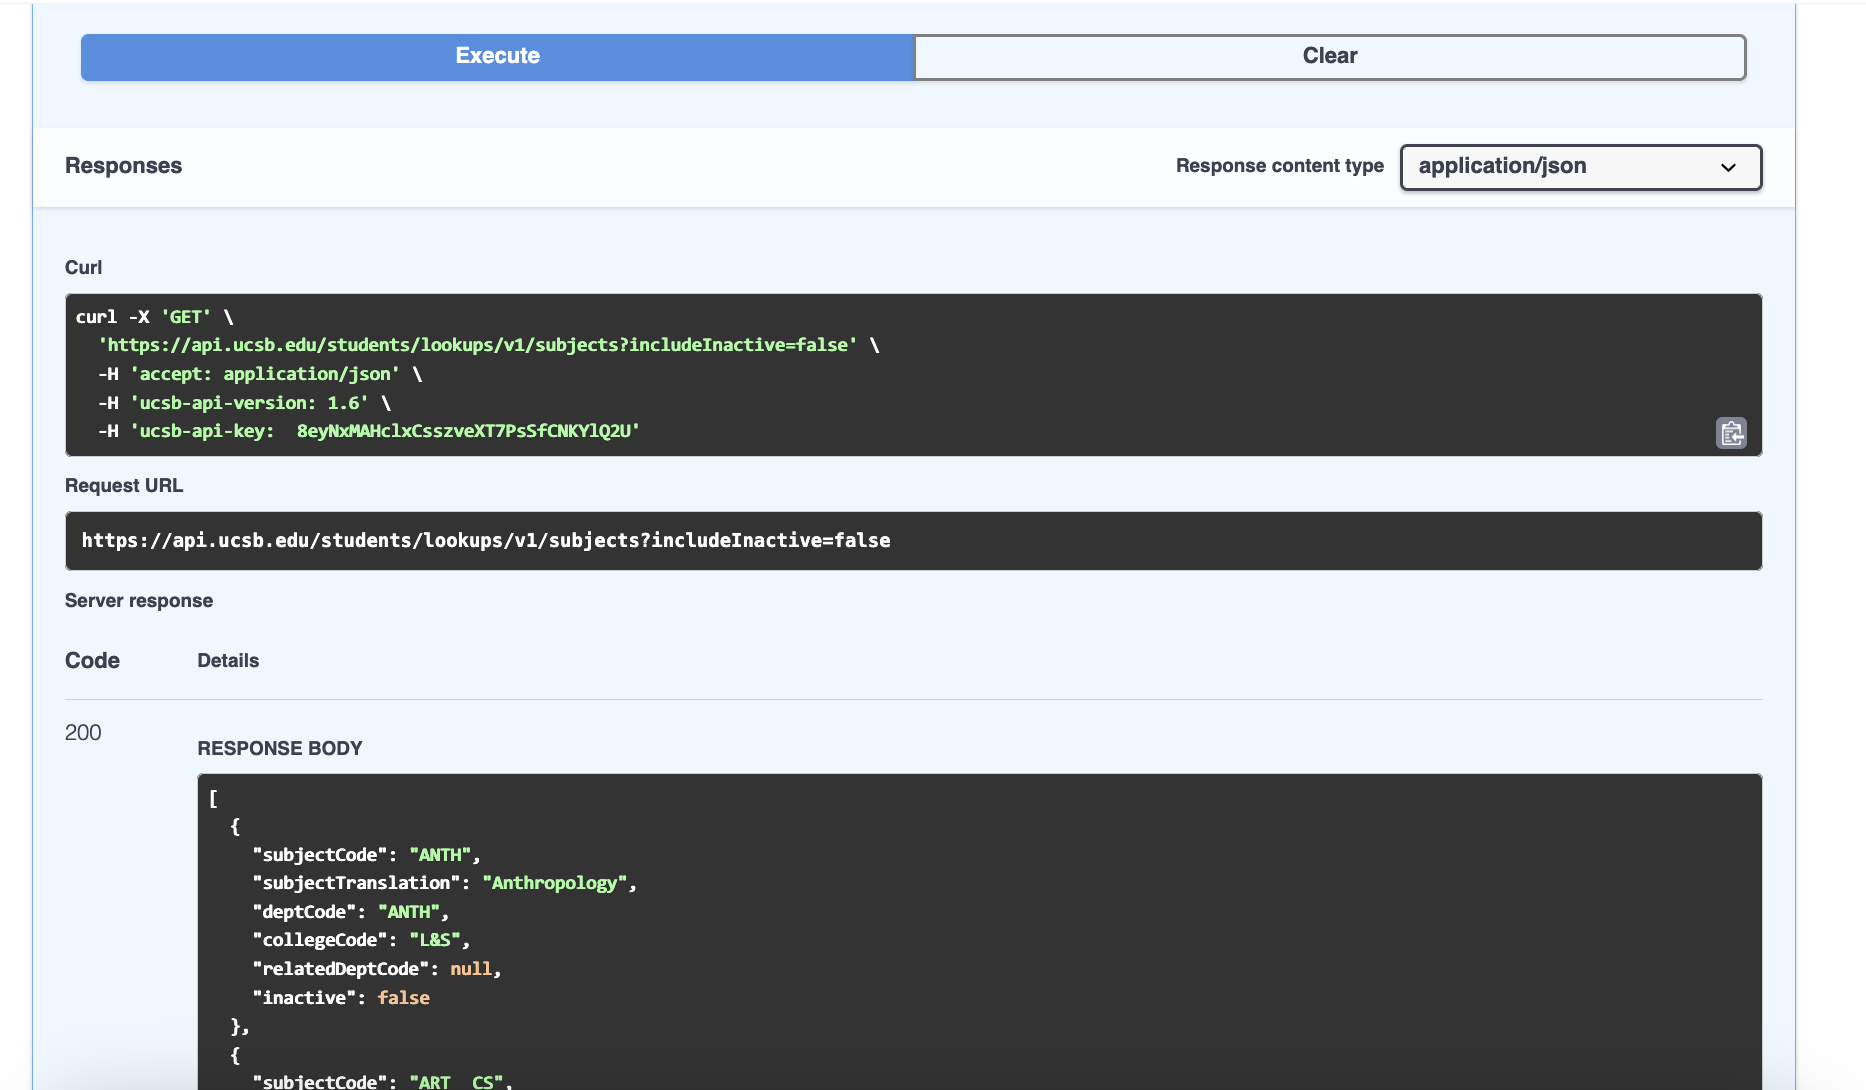

This shows a few things:
* The request url, in this case `https://api.ucsb.edu/students/lookups/v1/subjects?includeInactive=false`
* The request headers, in this case:
  * `'accept: application/json'`
  * `'ucsb-api-version: 1.6'`
  * `'ucsb-api-key:  8eyNxMAHclxCsszveXT7PsSfCNKYlQ2U'` (this was a real API key when I made this screenshot and these notes, but I've since disabled it)
* The results (shown under `Response Body`)

We can copy or download these results using the button at lower right (as shown in the image below):

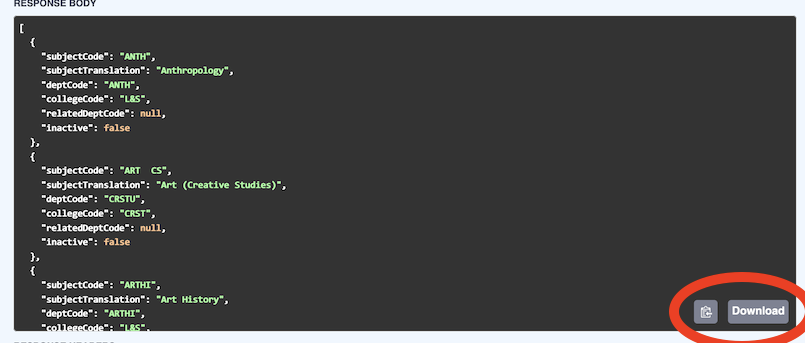

Or, we can move on to getting the results directly with Python code.  Let's try that instead:

In [ ]:
from google.colab import userdata
API_KEY = userdata.get('API_KEY')

# Accessing UCSB Developer API with Python Code

(This explanation assumes you already read through the section on
accessing the UCSB Developer API Interactively.)

We'll use the Gemini AI to generate some code for us to do the job.

Note that the API key below was a real one at the time I generated this code, but I've since disabled it to avoid abuse by non-UCSB actors.


In [ ]:
# prompt: I want to get the results from this API endpoint:
# https://api.ucsb.edu/students/lookups/v1/subjects?includeInactive=false
# With these headers:
# 'accept: application/json'
# 'ucsb-api-version: 1.6'
# 'ucsb-api-key: 8eyNxMAHclxCsszveXT7PsSfCNKYlQ2U'
# Please generate Python code to do this using the requests module and translate the json response into a Python dictionary

from datascience import *
import numpy as np
import matplotlib.pyplot as plots
from urllib.request import urlopen
import re
import json
from google.colab import userdata
import requests
from pprint import pprint


# Accessing UCSB Developer API with Python Code

# Replace with your actual API key if different from userdata
api_key = "8eyNxMAHclxCsszveXT7PsSfCNKYlQ2U"  # Example API key, replace with your actual key

headers = {
    'accept': 'application/json',
    'ucsb-api-version': '1.6',
    'ucsb-api-key': api_key
}

url = "https://api.ucsb.edu/students/lookups/v1/subjects?includeInactive=false" # Assuming the base URL is already set up in your environment.  You might need to add it to the URL if the base is not already set.

try:
    response = requests.get(url, headers=headers)
    response.raise_for_status() # Raise an exception for bad status codes (4xx or 5xx)

    data = response.json() # Parse the JSON response into a Python dictionary

    # Now you can work with the 'data' dictionary
    pprint(data)

except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
except json.JSONDecodeError as e:
    print(f"Error decoding JSON response: {e}")
    print(f"Response content: {response.text}")


[{'collegeCode': 'L&S',
  'deptCode': 'ANTH',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ANTH',
  'subjectTranslation': 'Anthropology'},
 {'collegeCode': 'CRST',
  'deptCode': 'CRSTU',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ART  CS',
  'subjectTranslation': 'Art (Creative Studies)'},
 {'collegeCode': 'L&S',
  'deptCode': 'ARTHI',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ARTHI',
  'subjectTranslation': 'Art History'},
 {'collegeCode': 'L&S',
  'deptCode': 'ART',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ARTST',
  'subjectTranslation': 'Art Studio'},
 {'collegeCode': 'L&S',
  'deptCode': 'ASAM',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'AS AM',
  'subjectTranslation': 'Asian American Studies'},
 {'collegeCode': 'L&S',
  'deptCode': 'PHYS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ASTRO',
  'subjectTranslation': 'Astronomy'},
 {'collegeCode': 

In case you are reading through the notebook and the API key is not working, when it is working, the result you get back is this:

In [5]:
codes = [{'collegeCode': 'L&S',
  'deptCode': 'ANTH',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ANTH',
  'subjectTranslation': 'Anthropology'},
 {'collegeCode': 'CRST',
  'deptCode': 'CRSTU',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ART  CS',
  'subjectTranslation': 'Art (Creative Studies)'},
 {'collegeCode': 'L&S',
  'deptCode': 'ARTHI',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ARTHI',
  'subjectTranslation': 'Art History'},
 {'collegeCode': 'L&S',
  'deptCode': 'ART',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ARTST',
  'subjectTranslation': 'Art Studio'},
 {'collegeCode': 'L&S',
  'deptCode': 'ASAM',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'AS AM',
  'subjectTranslation': 'Asian American Studies'},
 {'collegeCode': 'L&S',
  'deptCode': 'PHYS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ASTRO',
  'subjectTranslation': 'Astronomy'},
 {'collegeCode': 'CRST',
  'deptCode': 'CRSTU',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'BIOL CS',
  'subjectTranslation': 'Biology (Creative Studies)'},
 {'collegeCode': 'L&S',
  'deptCode': 'BLKST',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'BL ST',
  'subjectTranslation': 'Black Studies'},
 {'collegeCode': 'L&S',
  'deptCode': 'CLIT',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'C LIT',
  'subjectTranslation': 'Comparative Literature'},
 {'collegeCode': 'ENGR',
  'deptCode': 'CNENG',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'CH E',
  'subjectTranslation': 'Chemical Engineering'},
 {'collegeCode': 'L&S',
  'deptCode': 'CHST',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'CH ST',
  'subjectTranslation': 'Chicano Studies'},
 {'collegeCode': 'CRST',
  'deptCode': 'CRSTU',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'CHEM CS',
  'subjectTranslation': 'Chemistry (Creative Studies)'},
 {'collegeCode': 'L&S',
  'deptCode': 'EALCS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'CHIN',
  'subjectTranslation': 'Chinese'},
 {'collegeCode': 'L&S',
  'deptCode': 'CLASS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'CLASS',
  'subjectTranslation': 'Classics'},
 {'collegeCode': 'ENGR',
  'deptCode': 'CMPSC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'CMPSC',
  'subjectTranslation': 'Computer Science'},
 {'collegeCode': 'L&S',
  'deptCode': 'COMM',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'COMM',
  'subjectTranslation': 'Communication'},
 {'collegeCode': 'L&S',
  'deptCode': 'THTDA',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'DANCE',
  'subjectTranslation': 'Dance'},
 {'collegeCode': 'ENGR',
  'deptCode': 'ECE',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ECE',
  'subjectTranslation': 'Electrical Computer Engineering'},
 {'collegeCode': 'L&S',
  'deptCode': 'ECON',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ECON',
  'subjectTranslation': 'Economics'},
 {'collegeCode': 'GSE',
  'deptCode': 'EDUC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ED',
  'subjectTranslation': 'Education'},
 {'collegeCode': 'GSE',
  'deptCode': 'EDUC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ED   E',
  'subjectTranslation': 'Education: English'},
 {'collegeCode': 'GSE',
  'deptCode': 'EDUC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ED   M',
  'subjectTranslation': 'Mathematics'},
 {'collegeCode': 'GSE',
  'deptCode': 'EDUC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ED   S',
  'subjectTranslation': 'Science'},
 {'collegeCode': 'L&S',
  'deptCode': 'ENGL',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ENGL',
  'subjectTranslation': 'English'},
 {'collegeCode': 'ENGR',
  'deptCode': 'ENGSC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ENGR',
  'subjectTranslation': 'Engineering Sciences'},
 {'collegeCode': 'L&S',
  'deptCode': 'ENVST',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ENV S',
  'subjectTranslation': 'Environmental Studies'},
 {'collegeCode': 'L&S',
  'deptCode': 'FR&IT',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'FR',
  'subjectTranslation': 'French'},
 {'collegeCode': 'CRST',
  'deptCode': 'CRSTU',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'GEN SCS',
  'subjectTranslation': 'General Studies (Creative Studies)'},
 {'collegeCode': 'L&S',
  'deptCode': 'GEOG',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'GEOG',
  'subjectTranslation': 'Geography'},
 {'collegeCode': 'L&S',
  'deptCode': 'GERSL',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'GER',
  'subjectTranslation': 'German'},
 {'collegeCode': 'L&S',
  'deptCode': 'CLASS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'GREEK',
  'subjectTranslation': 'Greek'},
 {'collegeCode': 'L&S',
  'deptCode': 'RELST',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'HEB',
  'subjectTranslation': 'Hebrew'},
 {'collegeCode': 'L&S',
  'deptCode': 'HIST',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'HIST',
  'subjectTranslation': 'History'},
 {'collegeCode': 'L&S',
  'deptCode': 'INT',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'INT',
  'subjectTranslation': 'Interdisciplinary'},
 {'collegeCode': 'L&S',
  'deptCode': 'FR&IT',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ITAL',
  'subjectTranslation': 'Italian'},
 {'collegeCode': 'L&S',
  'deptCode': 'EALCS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'JAPAN',
  'subjectTranslation': 'Japanese'},
 {'collegeCode': 'L&S',
  'deptCode': 'LAIS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'LAIS',
  'subjectTranslation': 'Latin American and Iberian Studies'},
 {'collegeCode': 'L&S',
  'deptCode': 'CLASS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'LATIN',
  'subjectTranslation': 'Latin'},
 {'collegeCode': 'L&S',
  'deptCode': 'LING',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'LING',
  'subjectTranslation': 'Linguistics'},
 {'collegeCode': 'CRST',
  'deptCode': 'CRSTU',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'LIT  CS',
  'subjectTranslation': 'Literature (Creative Studies)'},
 {'collegeCode': 'L&S',
  'deptCode': 'MATH',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'MATH',
  'subjectTranslation': 'Mathematics'},
 {'collegeCode': 'CRST',
  'deptCode': 'CRSTU',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'MATH CS',
  'subjectTranslation': 'Mathematics (Creative Studies)'},
 {'collegeCode': 'ENGR',
  'deptCode': 'MATRL',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'MATRL',
  'subjectTranslation': 'Materials'},
 {'collegeCode': 'ENGR',
  'deptCode': 'ME',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ME',
  'subjectTranslation': 'Mechanical Engineering'},
 {'collegeCode': 'L&S',
  'deptCode': 'MDVST',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ME ST',
  'subjectTranslation': 'Medieval Studies'},
 {'collegeCode': 'L&S',
  'deptCode': 'MILSC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'MS',
  'subjectTranslation': 'Military Science'},
 {'collegeCode': 'L&S',
  'deptCode': 'MUSIC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'MUS',
  'subjectTranslation': 'Music'},
 {'collegeCode': 'CRST',
  'deptCode': 'CRSTU',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'MUS  CS',
  'subjectTranslation': 'Music (Creative Studies)'},
 {'collegeCode': 'L&S',
  'deptCode': 'MUSIC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'MUS A',
  'subjectTranslation': 'Music Performance Laboratories'},
 {'collegeCode': 'L&S',
  'deptCode': 'PHIL',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'PHIL',
  'subjectTranslation': 'Philosophy'},
 {'collegeCode': 'L&S',
  'deptCode': 'PHYS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'PHYS',
  'subjectTranslation': 'Physics'},
 {'collegeCode': 'CRST',
  'deptCode': 'CRSTU',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'PHYS CS',
  'subjectTranslation': 'Physics (Creative Studies)'},
 {'collegeCode': 'L&S',
  'deptCode': 'POLS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'POL S',
  'subjectTranslation': 'Political Science'},
 {'collegeCode': 'L&S',
  'deptCode': 'SP&PT',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'PORT',
  'subjectTranslation': 'Portuguese'},
 {'collegeCode': 'L&S',
  'deptCode': 'PSY',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'PSY',
  'subjectTranslation': 'Psychology'},
 {'collegeCode': 'L&S',
  'deptCode': 'RENST',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'RENST',
  'subjectTranslation': 'Renaissance Studies'},
 {'collegeCode': 'L&S',
  'deptCode': 'RELST',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'RG ST',
  'subjectTranslation': 'Religious Studies'},
 {'collegeCode': 'L&S',
  'deptCode': 'GERSL',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'RUSS',
  'subjectTranslation': 'Russian'},
 {'collegeCode': 'L&S',
  'deptCode': 'SOC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'SOC',
  'subjectTranslation': 'Sociology'},
 {'collegeCode': 'L&S',
  'deptCode': 'SP&PT',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'SPAN',
  'subjectTranslation': 'Spanish'},
 {'collegeCode': 'L&S',
  'deptCode': 'STATS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'PSTAT',
  'subjectTranslation': 'Statistics & Applied Probability'},
 {'collegeCode': 'L&S',
  'deptCode': 'SPCH',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'SHS',
  'subjectTranslation': 'Speech & Hearing Sciences'},
 {'collegeCode': 'GSE',
  'deptCode': 'CNCSP',
  'inactive': False,
  'relatedDeptCode': 'EDUC',
  'subjectCode': 'CNCSP',
  'subjectTranslation': 'Counseling, Clinical, School Psychology'},
 {'collegeCode': 'CRST',
  'deptCode': 'CRSTU',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'INT  CS',
  'subjectTranslation': 'Interdisciplinary (Creative Studies)'},
 {'collegeCode': 'L&S',
  'deptCode': 'THTDA',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'THTR',
  'subjectTranslation': 'Theater'},
 {'collegeCode': 'L&S',
  'deptCode': 'FEMST',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'FEMST',
  'subjectTranslation': 'Feminist Studies'},
 {'collegeCode': 'L&S',
  'deptCode': 'EALCS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'KOR',
  'subjectTranslation': 'Korean'},
 {'collegeCode': 'L&S',
  'deptCode': 'EALCS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'EACS',
  'subjectTranslation': 'East Asian Cultural Studies'},
 {'collegeCode': 'CRST',
  'deptCode': 'CRSTU',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'CMPSCCS',
  'subjectTranslation': 'Computer Science (Creative Studies)'},
 {'collegeCode': 'L&S',
  'deptCode': 'ERTSC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'EARTH',
  'subjectTranslation': 'Earth Science'},
 {'collegeCode': 'GSE',
  'deptCode': 'EDUC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ED   A',
  'subjectTranslation': 'Visual Art'},
 {'collegeCode': 'GSE',
  'deptCode': 'EDUC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ED   HSS',
  'subjectTranslation': 'History & Social Science'},
 {'collegeCode': 'GSE',
  'deptCode': 'EDUC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ED   L',
  'subjectTranslation': 'Literacy'},
 {'collegeCode': 'GSE',
  'deptCode': 'EDUC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ED   LA',
  'subjectTranslation': 'Language Arts'},
 {'collegeCode': 'GSE',
  'deptCode': 'EDUC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ED   WL',
  'subjectTranslation': 'World Language'},
 {'collegeCode': 'L&S',
  'deptCode': 'MCDB',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'MCDB W',
  'subjectTranslation': 'Molecular,Cellular,Develop. Bio (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'CHEM',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'CHEM W',
  'subjectTranslation': 'Chemistry and Biochemistry (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'GEOG',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'GEOG W',
  'subjectTranslation': 'Geography (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'STATS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'PSTATW',
  'subjectTranslation': 'Stats & Applied Probability (Online)'},
 {'collegeCode': 'ENGR',
  'deptCode': 'TMP',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'TMP',
  'subjectTranslation': 'Technology Management'},
 {'collegeCode': 'L&S',
  'deptCode': 'WRIT',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'WRIT',
  'subjectTranslation': 'Writing'},
 {'collegeCode': 'L&S',
  'deptCode': 'ART',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ART',
  'subjectTranslation': 'Art'},
 {'collegeCode': 'ESM',
  'deptCode': 'ESM',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ESM',
  'subjectTranslation': 'Environmental Science & Management'},
 {'collegeCode': 'L&S',
  'deptCode': 'EEMB',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'EEMB',
  'subjectTranslation': 'Ecology, Evolution & Marine Biology'},
 {'collegeCode': 'L&S',
  'deptCode': 'MCDB',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'MCDB',
  'subjectTranslation': 'Molecular, Cellular & Develop. Biology'},
 {'collegeCode': 'L&S',
  'deptCode': 'GLOBL',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'GLOBL',
  'subjectTranslation': 'Global Studies'},
 {'collegeCode': 'L&S',
  'deptCode': 'MARSC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'MARSC',
  'subjectTranslation': 'Marine Science'},
 {'collegeCode': 'L&S',
  'deptCode': 'GERSL',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'SLAV',
  'subjectTranslation': 'Slavic'},
 {'collegeCode': 'L&S',
  'deptCode': 'GLOBL',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'GPS',
  'subjectTranslation': 'Global Peace and Security'},
 {'collegeCode': 'L&S',
  'deptCode': 'MAT',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'MAT',
  'subjectTranslation': 'Media Arts and Technology'},
 {'collegeCode': 'L&S',
  'deptCode': 'CHEM',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'CHEM',
  'subjectTranslation': 'Chemistry and Biochemistry'},
 {'collegeCode': 'L&S',
  'deptCode': 'RELST',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'MES',
  'subjectTranslation': 'Middle East Studies'},
 {'collegeCode': 'L&S',
  'deptCode': 'ESS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ES   1-',
  'subjectTranslation': 'Exercise Sport'},
 {'collegeCode': 'L&S',
  'deptCode': 'ESS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ESS',
  'subjectTranslation': 'Exercise & Sport Studies'},
 {'collegeCode': 'L&S',
  'deptCode': 'THTDA',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'DANCEW',
  'subjectTranslation': 'Dance (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'PSY',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'DYNS',
  'subjectTranslation': 'Dynamical Neuroscience'},
 {'collegeCode': 'L&S',
  'deptCode': 'ERTSC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'EARTHW',
  'subjectTranslation': 'Earth Science (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'WRIT',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'WRIT W',
  'subjectTranslation': 'Writing (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'ECON',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ECON W',
  'subjectTranslation': 'Economics (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'FEMST',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'FEMSTW',
  'subjectTranslation': 'Feminist Studies (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'EEMB',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'EEMB W',
  'subjectTranslation': 'Ecology, Evol. & Marine Biology (Online)'},
 {'collegeCode': 'GSE',
  'deptCode': 'EDUC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ED   IA',
  'subjectTranslation': 'Education: Industrial Technology Arts'},
 {'collegeCode': 'L&S',
  'deptCode': 'THTDA',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'THTR W',
  'subjectTranslation': 'Theater (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'SP&PT',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'SPAN W',
  'subjectTranslation': 'Spanish (Online)'},
 {'collegeCode': 'ENGR',
  'deptCode': 'ME',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ME   W',
  'subjectTranslation': 'Mechanical Engineering (Online)'},
 {'collegeCode': 'ENGR',
  'deptCode': 'ENGSC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ENGR W',
  'subjectTranslation': 'Engineering Sciences (Online)'},
 {'collegeCode': 'GRAD',
  'deptCode': 'GRDIV',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'GRAD',
  'subjectTranslation': 'Graduate Division'},
 {'collegeCode': 'L&S',
  'deptCode': 'POLS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'POL SW',
  'subjectTranslation': 'Political Science (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'HIST',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'HIST W',
  'subjectTranslation': 'History (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'ESS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ESS  W',
  'subjectTranslation': 'Excercise & Sport Studies (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'INT',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'INT  W',
  'subjectTranslation': 'Interdisciplinary (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'COMM',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'COMM W',
  'subjectTranslation': 'Communication (Online)'},
 {'collegeCode': 'GSE',
  'deptCode': 'EDUC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ED   W',
  'subjectTranslation': 'Education (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'FLMST',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'FAMST',
  'subjectTranslation': 'Film and Media Studies'},
 {'collegeCode': 'CRST',
  'deptCode': 'CRSTU',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'CMPTGCS',
  'subjectTranslation': 'Computing (Creative Studies)'},
 {'collegeCode': 'CRST',
  'deptCode': 'CRSTU',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'W&L  CS',
  'subjectTranslation': 'Writing & Literature (Creative Studies)'},
 {'collegeCode': 'ENGR',
  'deptCode': 'CNENG',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'CH E W',
  'subjectTranslation': 'Chemical Engineering (Online)'},
 {'collegeCode': 'ESM',
  'deptCode': 'ESM',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'EDS',
  'subjectTranslation': 'Environmental Data Science'},
 {'collegeCode': 'L&S',
  'deptCode': 'ARTHI',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ARTHIW',
  'subjectTranslation': 'Art History (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'FLMST',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'FAMSTW',
  'subjectTranslation': 'Film and Media Studies (Online)'},
 {'collegeCode': 'ENGR',
  'deptCode': 'CMPSC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'CMPSCW',
  'subjectTranslation': 'Computer Science (Online)'},
 {'collegeCode': 'GSE',
  'deptCode': 'CNCSP',
  'inactive': False,
  'relatedDeptCode': 'EDUC',
  'subjectCode': 'CNCSPW',
  'subjectTranslation': 'Counseling, Clinical, School Psy(Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'LING',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'LING W',
  'subjectTranslation': 'Linguistics (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'PHYS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'PHYS W',
  'subjectTranslation': 'Physics (Online)'},
 {'collegeCode': 'ENGR',
  'deptCode': 'BENG',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'BIOE',
  'subjectTranslation': 'Biological Engineering'},
 {'collegeCode': 'L&S',
  'deptCode': 'ENVST',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ENV SW',
  'subjectTranslation': 'Environmental Studies (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'ESS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ES',
  'subjectTranslation': 'Exercise Sport'},
 {'collegeCode': 'L&S',
  'deptCode': 'SOC',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'SOC  W',
  'subjectTranslation': 'Sociology (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'ASAM',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'AS AMW',
  'subjectTranslation': 'Asian American Studies (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'EALCS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'JAPANW',
  'subjectTranslation': 'Japanese (Online)'},
 {'collegeCode': 'CRST',
  'deptCode': 'CRSTU',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'MARINCS',
  'subjectTranslation': 'Marine Science (Creative Studies)'},
 {'collegeCode': 'L&S',
  'deptCode': 'PHYS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'ASTROW',
  'subjectTranslation': 'Astronomy (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'EALCS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'CHIN W',
  'subjectTranslation': 'Chinese (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'RELST',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'RG STW',
  'subjectTranslation': 'Religious Studies (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'CHST',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'CH STW',
  'subjectTranslation': 'Chicano Studies (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'PSY',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'PSY  W',
  'subjectTranslation': 'Psychology (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'SP&PT',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'PORT W',
  'subjectTranslation': 'Portuguese (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'POLS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'POL SH',
  'subjectTranslation': 'Political Science (Hybrid)'},
 {'collegeCode': 'CRST',
  'deptCode': 'CRSTU',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'W&L  CSW',
  'subjectTranslation': 'Writing & Lit(Creative Studies) (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'BMSE',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'IQB',
  'subjectTranslation': 'Interdis. Program in Quantitative Biosci'},
 {'collegeCode': 'GRAD',
  'deptCode': 'GRDIV',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'GRAD W',
  'subjectTranslation': 'Graduate Division (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'GLOBL',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'GLOBLW',
  'subjectTranslation': 'Global Studies (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'LAIS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'LAIS W',
  'subjectTranslation': 'Latin American and Iberian Stds (Online)'},
 {'collegeCode': 'L&S',
  'deptCode': 'CLIT',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'C LITW',
  'subjectTranslation': 'Comparative Literature'},
 {'collegeCode': 'L&S',
  'deptCode': 'EALCS',
  'inactive': False,
  'relatedDeptCode': None,
  'subjectCode': 'KOR  W',
  'subjectTranslation': 'Korean (Online)'}]

This variable `codes` has a particular structure: it's a *list of dictionaries*.  That is, the type of `codes` is list:

In [6]:
type(codes)

list

And the type of each item in that list is a dictionary:

In [7]:
type(codes[0])

dict

In [8]:
type(codes[1])

dict

It turns out that the `datascience` module has a convenient way to turn a list like this into a table:

In [9]:
codeTable = Table().from_records(codes)
codeTable

collegeCode,deptCode,inactive,relatedDeptCode,subjectCode,subjectTranslation
L&S,ANTH,False,None,ANTH,Anthropology
CRST,CRSTU,False,None,ART CS,Art (Creative Studies)
L&S,ARTHI,False,None,ARTHI,Art History
L&S,ART,False,None,ARTST,Art Studio
L&S,ASAM,False,None,AS AM,Asian American Studies
L&S,PHYS,False,None,ASTRO,Astronomy
CRST,CRSTU,False,None,BIOL CS,Biology (Creative Studies)
L&S,BLKST,False,None,BL ST,Black Studies
L&S,CLIT,False,None,C LIT,Comparative Literature
ENGR,CNENG,False,None,CH E,Chemical Engineering


We can save this to a .csv file like this:

In [10]:
codeTable.to_csv('codes.csv')

If we've mounted our Google Drive using the commands we typically put at the top of Google Colab notebooks, e.g.
```python
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
```

Then we can use this to copy the resulting file `codes.csv` into our Google Drive:

In [12]:
!cp codes.csv "/content/drive/My Drive"